# Various Machine Learning Algorithms
- In this section, we shall experience commonly used machine learning algorithms all at once

## Target data
- Target dataset for Iris data (classification of iris flowers).
- https://en.wikipedia.org/wiki/Iris_flower_data_set
  - sepal.length：がくの長さ
  - sepal.width：がくの幅
  - petal.length：花弁の長さ
  - petal.width：花弁の幅
  - variety:アヤメの種類(Iris species)
    - Setosa
    - Versicolor
    - Virginica

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Class/MusashinoUniversity/AdvancedArtificialIntelligence/Lec04/iris.csv', index_col=None, header=0)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

## Label encoding
- Since variety is a string, it is difficult to handle, so it is numerically encoded in a way that represents Setosa as 0, Versicolor as 1, Virginica as 2, and so on. This is called label encoding.
-a
- For string data (categorical variables), the process is often called encoding.
  - One-hot encoding
    - 001 for Setosa, 010 for Versicolor, 100 for Virginica
  - Label encoding
    - 0 for Setosa, 1 for Versicolor, 2 for Virginica
  - Count encoding
    - If each number is different, the total number is used as the value as it is
  - Target encoding
    - Target encoding Target encoding Target encoding Target encoding Target encoding Target encoding Target encoding Target encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['variety'].values)
df['label']=label
df

,sepal.length,sepal.width,petal.length,petal.width,variety,label
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


In [ ]:
le.classes_

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
X=df.loc[:, ['sepal.length','sepal.width', 'petal.length', 'petal.width']].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y=df['label'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Difference between classification and clustering (supervised/unsupervised learning)
- Classification: Separate data based on training data
  - Predict unknown iris_label by pre-training using iris_data and iris_label
- Clustering: divide data based on data similarity
  - Separate data using iris_data only

# Classification (supervised learning)

## Split training and test data
- When running a classification algorithm, the training data and test data are split, training is performed on the training data, and the test data is used to check if it can be successfully classified.
- For this purpose, we split the training data and test data for the data with correct answer labels in advance.

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [ ]:
X_train.shape

(112, 4)

In [ ]:
y_train.shape

(112,)

In [ ]:
X_test.shape

(38, 4)

In [ ]:
y_test.shape

(38,)

## Logistic Regression
- Applying linear regression to classification problems


### Graph of $y=\log(\frac{p(Y=1)}{1-p(Y=1)})$

<ipython-input-16-b7d2916ca3a7>:6: RuntimeWarning: divide by zero encountered in divide
  y = np.log(py/(1-py))
<ipython-input-16-b7d2916ca3a7>:6: RuntimeWarning: divide by zero encountered in log
  y = np.log(py/(1-py))


Text(0, 0.5, '$y$')

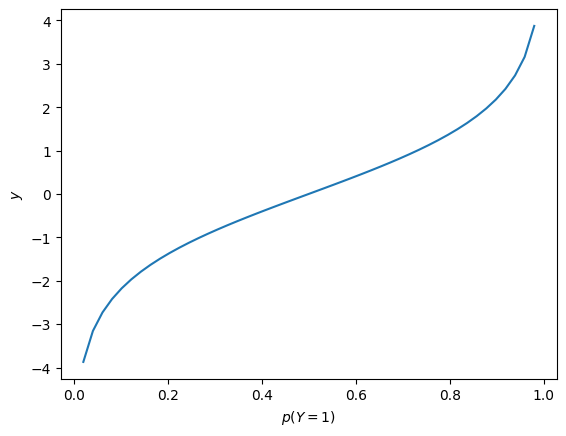

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

py = np.linspace(0, 1)

y = np.log(py/(1-py))

plt.plot(py, y)
plt.xlabel('$p(Y=1)$')
plt.ylabel('$y$')

### Graph of $p(Y=1)=\frac{1}{1+e^{-y}}$

<ipython-input-17-e97b52847466>:6: RuntimeWarning: divide by zero encountered in divide
  y = np.log(py/(1-py))
<ipython-input-17-e97b52847466>:6: RuntimeWarning: divide by zero encountered in log
  y = np.log(py/(1-py))


Text(0, 0.5, '$p(Y=1)$')

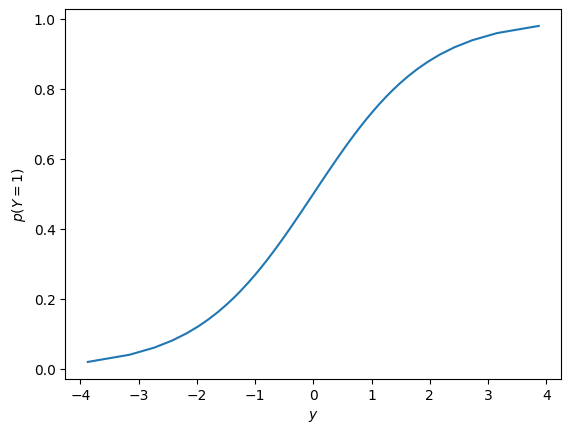

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

py = np.linspace(0, 1)

y = np.log(py/(1-py))
p=1/(1+np.exp(-y))

plt.plot(y, p)
plt.xlabel('$y$')
plt.ylabel('$p(Y=1)$')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

# Training
model.fit(X_train, y_train)

# Predicting
y_pred=model.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9736842105263158

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression(max_iter=1000)

# Training
model.fit(X_train, y_train)

# Predicting
y_pred=model.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

0.9736842105263158

- input other data.

In [ ]:
import numpy as np
X_new=np.array([[2.3 , 2.4 , 3.5, 5.2]])

In [ ]:
model.predict(X_new)

array([2])

In [ ]:
le.inverse_transform(model.predict(X_new))

array(['Virginica'], dtype=object)

## Support Vector Machine
- Algorithm that implements classification based on the concept of margin maximization.
  - The algorithm tries to obtain more reasonable boundaries by increasing the margin between the decision boundary and the training data.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model=SVC()

# Training
model.fit(X_train, y_train)

# Predicting
y_pred=model.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

0.9736842105263158

- input other data.

In [ ]:
import numpy as np
X_new=np.array([[2.3 , 2.4 , 3.5, 5.2]])

In [ ]:
model.predict(X_new)

array([2])

In [ ]:
le.inverse_transform(model.predict(X_new))

array(['Virginica'], dtype=object)

## Naive Bayes
- A method to calculate the probability that data is a certain label and classify the label with the largest probability.
- Famous for its application to spam mail filtering

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model=GaussianNB()

# Traning
model.fit(X_train, y_train)

# Predicting
y_pred=model.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

0.8947368421052632

In [ ]:
import numpy as np
X_new=np.array([[4.3 , 1.4 , 2.5, 0.2]])

In [ ]:
model.predict(X_new)

array([0])

In [ ]:
le.inverse_transform(model.predict(X_new))

array(['Setosa'], dtype=object)

## Decision Tree
- Algorithm for classification by realizing a partition of a tree structure
- Recursive partitioning from roots to leaves
  - Select a feature at random and make it a root. Create a branch for each feature.
  - Split the training data into subsets (one subset per branch).
  - The same procedure is performed optimally for each branch.
  - The same procedure is performed optimally for each branch. The process ends when the allocated training data are in the same class.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

# Traning
model.fit(X_train, y_train)

# Predicting
y_pred=model.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

0.9473684210526315

In [ ]:
import numpy as np
X_new=np.array([[5.3 , 5.4 , 6.5, 5.2]])

In [ ]:
model.predict(X_new)

array([2])

In [ ]:
le.inverse_transform(model.predict(X_new))

array(['Virginica'], dtype=object)

In [ ]:
!pip install export_graphviz
!pip install dtreeviz

ERROR: Could not find a version that satisfies the requirement export_graphviz (from versions: none)
ERROR: No matching distribution found for export_graphviz
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00


In [ ]:
feature_names=df.columns[0:4].values.tolist()
feature_names

['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

In [ ]:
class_names=le.classes_.tolist()
class_names

['Setosa', 'Versicolor', 'Virginica']

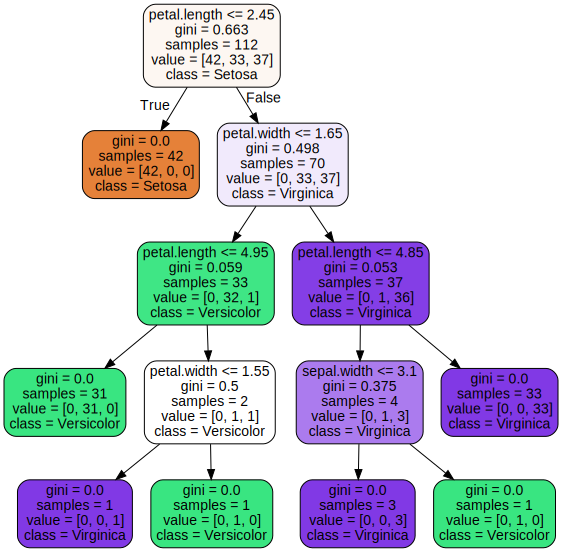

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot = export_graphviz(model, filled=True, rounded=True,
                      class_names=class_names,
                      feature_names=feature_names,
                      out_file=None)

graph = graphviz.Source(dot)
graph

In [ ]:
print(type(model))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [ ]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

print(dtreeviz.__version__)

NameError: name 'dtreeviz' is not defined

- dtreevizでさらなる可視化ができる
  - (WARNING:matplotlib.font_manager:findfont: Font family 'Arial' not found.)というwarningがたくさん出るが気にしないでおこう

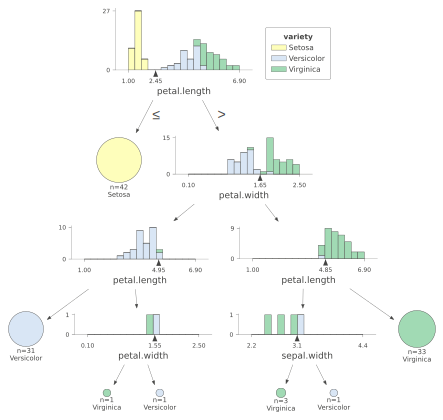

In [ ]:
import dtreeviz

viz_model = dtreeviz.model(model,
                           X_train=X_train, y_train=y_train,
                           feature_names=feature_names,
                           target_name='variety',
                           class_names=class_names)

viz_model.view()

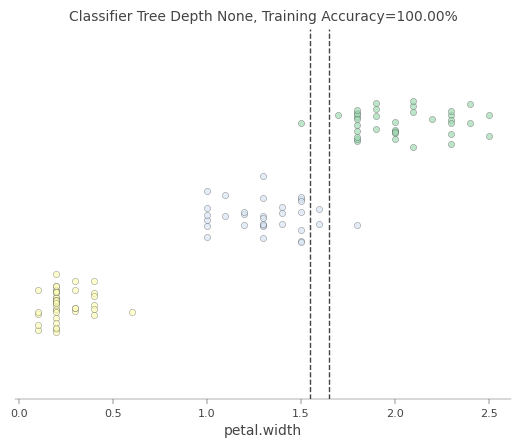

In [ ]:
viz_model.ctree_feature_space(show={'splits','title'}, features=['petal.width'])

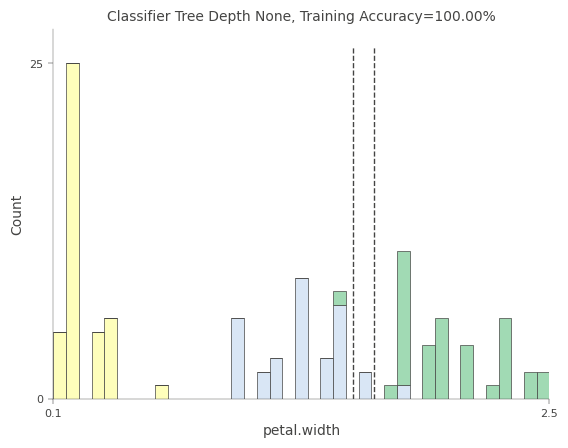

In [ ]:
viz_model.ctree_feature_space(nbins=40, gtype='barstacked', show={'splits','title'}, features=['petal.width'])

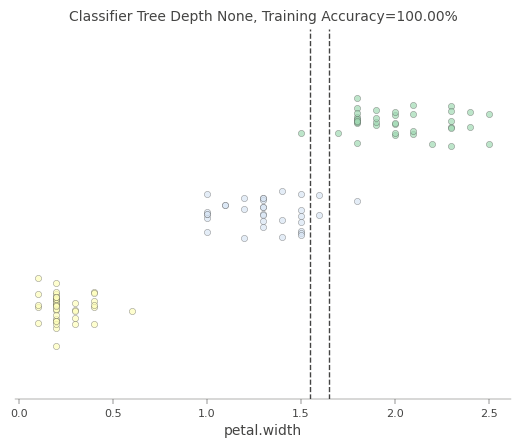

In [ ]:
viz_model.ctree_feature_space(show={'splits','title'}, features=['petal.width'])

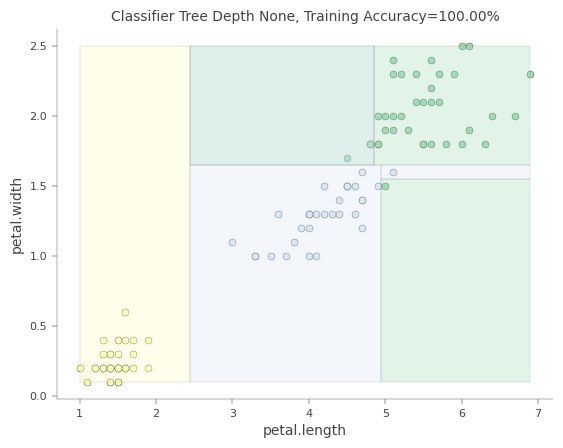

In [ ]:
viz_model.ctree_feature_space(show={'splits','title'}, features=['petal.length', 'petal.width'])

##Ensemble learning
- Using a large number of classifiers to make decisions and then combining the results often yields better results than using a single classifier--> Ensemble Learning
  - Bagging (bootstrap aggregation)
  - Boosting
  - Stacking



### Bagging (Bootstrap Aggregation)
- Randomly sample different subsets of the training data, train each subset, create multiple classifiers, and aggregate the results by averaging or voting.


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model=BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True)

# Training
model.fit(X_train, y_train)

# Predicting
y_pred=model.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

0.8947368421052632

In [ ]:
import numpy as np
X_new=np.array([[5.3 , 2.4 , 3.5, 1.2]])

In [ ]:
model.predict(X_new)

array([1])

In [ ]:
le.inverse_transform(model.predict(X_new))

array(['Versicolor'], dtype=object)

### Random Forest
- A method that uses multiple decision trees to improve prediction accuracy compared to decision trees alone.
- Random Forest ensures the diversity of multiple decision trees by creating a diverse data set through the aforementioned bootstrapping and at the same time randomly selecting only some of the features.
- Returns the result of the classification result by taking a majority vote of the predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model=RandomForestClassifier()

# Training
model.fit(X_train, y_train)

# Predicting
y_pred=model.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

0.8947368421052632

In [ ]:
import numpy as np
X_new=np.array([[5.3 , 2.4 , 3.5, 1.2]])

In [ ]:
model.predict(X_new)

array([1])

In [ ]:
le.inverse_transform(model.predict(X_new))

array(['Versicolor'], dtype=object)

- The beauty of Random Forest is that you can know the relative importance of each feature

In [ ]:
model.feature_importances_

array([0.08729243, 0.02951091, 0.35765414, 0.52554253])

In [ ]:
for name, score in zip(df.columns[0:4].values, model.feature_importances_):
  print(name, score)

sepal.length 0.08729243404955662
sepal.width 0.029510905312707357
petal.length 0.35765413518808026
petal.width 0.5255425254496557


### Adaboost.
- Train a classifier, such as a base decision tree, use the training set as a target for prediction, give relative weights to those that fail to classify, train a second classifier, and repeat


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=None))

# Training
model.fit(X_train, y_train)

# Predicting
y_pred=model.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)


0.9473684210526315

In [ ]:
import numpy as np
X_new=np.array([[5.3 , 2.4 , 3.5, 1.2]])

In [ ]:
model.predict(X_new)

array([1])

In [ ]:
le.inverse_transform(model.predict(X_new))

array(['Versicolor'], dtype=object)

### Gradient boosting.
- A method of training a classifier, such as a base decision tree, and using the training set as a target for prediction, attempting to apply the new prediction to the residuals from the previous prediction, and repeating the process.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

model=GradientBoostingClassifier()

# Training
model.fit(X_train, y_train)

# Predicting
y_pred=model.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

0.8947368421052632

In [ ]:
import numpy as np
X_new=np.array([[5.3 , 2.4 , 3.5, 1.2]])

In [ ]:
model.predict(X_new)

array([1])

In [ ]:
le.inverse_transform(model.predict(X_new))

array(['Versicolor'], dtype=object)

### XGBoost
- eXtreme Gradient Boosting
  - https://arxiv.org/abs/1603.02754
    - First paper presented by Tianqi Chen and Carlos Guestrin (University of Washington) at KDD'16
- One of the methods of gradient boosting system
- https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tweedie-regression-objective-reg-tweedie

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier()

# Training
model.fit(X_train, y_train)

# Predicting
y_pred=model.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

0.8947368421052632

In [ ]:
import numpy as np
X_new=np.array([[5.3 , 2.4 , 3.5, 1.2]])

In [ ]:
model.predict(X_new)

array([1])

In [ ]:
le.inverse_transform(model.predict(X_new))

array(['Versicolor'], dtype=object)

### LightGBM
- Light Gradient Boosting Machine
  - https://proceedings.neurips.cc/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Paper.pdf
    - First paper presented by Microsoft at NIPS 2017
- One of the gradient boosting system methods

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

model = lgb.LGBMClassifier()

# Training
model.fit(X_train, y_train)

# Predicting
y_pred=model.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 4
[LightGBM] [Info] Start training from score -0.980829
[LightGBM] [Info] Start training from score -1.221991
[LightGBM] [Info] Start training from score -1.107581
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

0.8947368421052632

In [ ]:
import numpy as np
X_new=np.array([[5.3 , 2.4 , 3.5, 1.2]])

In [ ]:
model.predict(X_new)

array([1])

In [ ]:
le.inverse_transform(model.predict(X_new))

array(['Versicolor'], dtype=object)

## Catboost(Category Boosting)
- New gradient boosting algorithm that successfully handles categorical features and takes advantage of dealing with them
- it uses a new schema for calculating leaf values when selecting the tree structure, which helps to reduce overfitting.
- Presented by Yandex
- Source reference
  - https://proceedings.neurips.cc/paper_files/paper/2018/file/14491b756b3a51daac41c24863285549-Paper.pdf

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
import catboost as cb
from sklearn.metrics import accuracy_score

model = cb.CatBoostClassifier()

# Training
model.fit(X_train, y_train)

# Predicting
y_pred=model.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

Learning rate set to 0.070767
0:	learn: 1.0143168	total: 46.9ms	remaining: 46.9s
1:	learn: 0.9415501	total: 47.8ms	remaining: 23.9s
2:	learn: 0.8805302	total: 48.7ms	remaining: 16.2s
3:	learn: 0.8210717	total: 49.4ms	remaining: 12.3s
4:	learn: 0.7713086	total: 50.2ms	remaining: 9.99s
5:	learn: 0.7126283	total: 50.7ms	remaining: 8.4s
6:	learn: 0.6737615	total: 51.4ms	remaining: 7.29s
7:	learn: 0.6387756	total: 52.1ms	remaining: 6.46s
8:	learn: 0.6038779	total: 53.2ms	remaining: 5.85s
9:	learn: 0.5758720	total: 54ms	remaining: 5.35s
10:	learn: 0.5431116	total: 54.7ms	remaining: 4.92s
11:	learn: 0.5155521	total: 55.5ms	remaining: 4.57s
12:	learn: 0.4928663	total: 56.3ms	remaining: 4.27s
13:	learn: 0.4694608	total: 57ms	remaining: 4.01s
14:	learn: 0.4525414	total: 57.7ms	remaining: 3.79s
15:	learn: 0.4310302	total: 58.4ms	remaining: 3.59s
16:	learn: 0.4127483	total: 59.1ms	remaining: 3.42s
17:	learn: 0.4002694	total: 59.9ms	remaining: 3.27s
18:	learn: 0.3827534	total: 60.4ms	remaining: 3.1

0.8947368421052632

In [ ]:
import numpy as np
X_new=np.array([[5.3 , 2.4 , 3.5, 1.2]])

In [ ]:
model.predict(X_new)

array([[1]])

In [ ]:
le.inverse_transform(model.predict(X_new))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


array(['Versicolor'], dtype=object)

## kNN (k nearest neighbor method)
- An algorithm that calculates the distance between input data and training data, obtains the k nearest neighbors, and performs majority voting with training data labels to obtain the classification result.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model=KNeighborsClassifier()

# Training
model.fit(X_train, y_train)

# Predicting
y_pred=model.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

0.9736842105263158

In [ ]:
import numpy as np
X_new=np.array([[5.3 , 2.4 , 3.5, 1.2]])

In [ ]:
model.predict(X_new)

array([1])

In [ ]:
le.inverse_transform(model.predict(X_new))

array(['Versicolor'], dtype=object)

## Neural Network
- An algorithm consisting of an input layer, an intermediate layer, and an output layer.


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model=MLPClassifier()

# Training
model.fit(X_train, y_train)

# Predicting
y_pred=model.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


0.9736842105263158

- ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet. ConvergenceWarning
- Set hyperparameters to adjust and learn until convergence.
  - You can see the types of hyperparameters that can be set with mode.get_params() and their current settings.
    - For a detailed description of those hyperparameters, check the package's web page
      - Check the web page of the package for a detailed description of these hyperparameters. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
- 'max_iter': 200-->1000



In [ ]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model=MLPClassifier(max_iter=10000)

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.9736842105263158

#### How to choose a good hyperparameter value -> grid search
- Takes about 1 minute
- Examine the accuracy of the hyperparameters you want to adjust in a round-robin fashion

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

results = []
for hidden_layer_sizes in [10, 100, 1000]:
  for solver in ['sgd', 'adam', 'lbfgs']:
    for activation in ['identity', 'logistic', 'tanh', 'relu']:
      model = MLPClassifier(max_iter=10000,
                            hidden_layer_sizes=(hidden_layer_sizes,),
                            activation=activation,
                            solver=solver)
      model.fit(X_train, y_train)
      score = model.score(X_train, y_train)
      y_pred = model.predict(X_test)
      accuracy=accuracy_score(y_pred, y_test)
      results=np.append(results, [hidden_layer_sizes, activation, solver, score, accuracy]).reshape(-1, 5)

df_ac = pd.DataFrame(data=results, columns=['hidden_layer_sizes', 'activation', 'solver', 'score', 'accuracy'])
pd.set_option('display.max_rows', 100)
df_ac

,hidden_layer_sizes,activation,solver,score,accuracy
0,10,identity,sgd,0.9642857142857143,0.9736842105263158
1,10,logistic,sgd,0.8035714285714286,0.6052631578947368
2,10,tanh,sgd,0.9732142857142857,0.9736842105263158
3,10,relu,sgd,0.9732142857142857,0.9736842105263158
4,10,identity,adam,0.9821428571428571,0.9473684210526315
5,10,logistic,adam,0.9821428571428571,1.0
6,10,tanh,adam,0.9821428571428571,0.9736842105263158
7,10,relu,adam,0.9732142857142857,1.0
8,10,identity,lbfgs,1.0,0.9210526315789473
9,10,logistic,lbfgs,1.0,0.9210526315789473


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model = MLPClassifier(hidden_layer_sizes=100, activation='tanh', solver='sgd', max_iter=1000)

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


0.9736842105263158

In [ ]:
import numpy as np
X_new=np.array([[5.3 , 2.4 , 3.5, 1.2]])

In [ ]:
model.predict(X_new)

array([1])

In [ ]:
le.inverse_transform(model.predict(X_new))

array(['Versicolor'], dtype=object)

# [Personal assignment 1] Machine Learning with Titanic Data
- Read the Titanic passenger data (titnic.csv) and try out a machine learning model to predict Survived and increase the accuracy as much as possible.
Change the algorithm, the explanatory variables used, the way missing values are handled, and so on.

- Also look into XGBoost and LightGBM and try to implement them!


# Dimensionality Reduction
- Represent data with many variables with a small number of variables while preserving features.
- For Iris data
  - The data is represented by 4 variables: sepal.length (length of petals), sepal.width (width of petals), petal.length (length of petals), and petal.width (width of petals), which are defined by creating 2 new variables.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Class/MusashinoUniversity/AdvancedArtificialIntelligence/Lec04/iris.csv', index_col=None, header=0)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['variety'].values)
df['label']=label
df

,sepal.length,sepal.width,petal.length,petal.width,variety,label
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


In [ ]:
le.classes_

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
X=df.loc[:, ['sepal.length','sepal.width', 'petal.length', 'petal.width']].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y=df['label'].values

## PCA (Principal Component Analysis)
- A method to find principal components (consisting of direction and importance) in data and to represent the data using the principal components as new variables.

In [ ]:
from sklearn.decomposition import PCA

model=PCA(n_components=3)

# Extract the main components
model=model.fit(X)

# Transform data to principal components
X_dec_data=model.transform(X)

In [ ]:
model.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 3,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [ ]:
X_dec_data

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

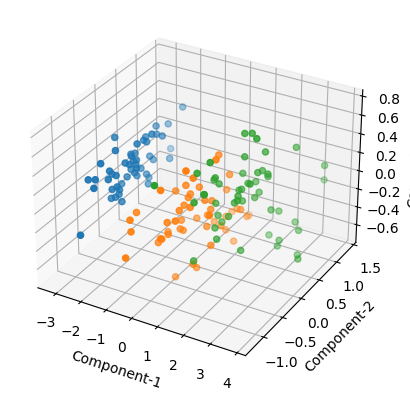

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

X0 = X_dec_data[y==0]
X1 = X_dec_data[y==1]
X2 = X_dec_data[y==2]
ax.scatter(X0[:, 0], X0[:, 1], X0[:, 2])
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2])
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2])

ax.set_xlabel("Component-1")
ax.set_ylabel("Component-2")
ax.set_zlabel("Component-3")

plt.show()

In [ ]:
import plotly
import plotly.express

fig=plotly.express.scatter_3d(x=X_dec_data[:,0], y=X_dec_data[:,1], z=X_dec_data[:,2], color=y,)
fig.update_traces(marker=dict(size=4))
fig.show()

In [ ]:
from sklearn.decomposition import PCA


model=PCA(n_components=2)

# Extract the main components
model=model.fit(X)

# Transform data to principal components
X_dec_data=model.transform(X)

In [ ]:
X_dec_data

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

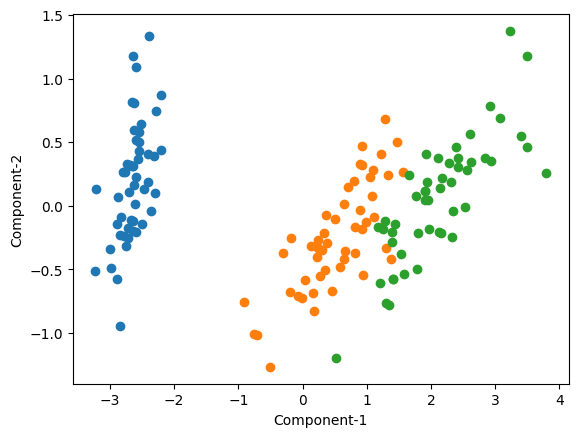

In [ ]:
import matplotlib.pyplot as plt
ig, ax = plt.subplots()

X0 = X_dec_data[y==0]
X1 = X_dec_data[y==1]
X2 = X_dec_data[y==2]
ax.scatter(X0[:, 0], X0[:, 1])
ax.scatter(X1[:, 0], X1[:, 1])
ax.scatter(X2[:, 0], X2[:, 1])

ax.set_xlabel("Component-1")
ax.set_ylabel("Component-2")


plt.show()

In [ ]:
import plotly
import plotly.express

fig=plotly.express.scatter(x=X_dec_data[:,0], y=X_dec_data[:,1], color=y)
fig.update_traces(marker=dict(size=10))
fig.show()

## t-SNE(t-Distributed Stochastic Neighbor Embedding)
- The similarity between the data $x_i$ and $x_j$ can be expressed by the simultaneous probability $p_{ij}$, and when the data of the dimensionality reduction terms are $x'_i$ and $x'_j$, their similarity can also be expressed by $q_{ij}$. The closeness of these two distributions $p$ and $q$ is expressed using KL-Divergence, and dimensionality reduction is performed so that these values are close.
- KL-Divergence(Kullback–Leibler divergence)
  - $D_{KL}(P||Q) = \int_{-\infty}^{\infty}p(x_i,x_j) \log \frac{p(x_i,x_j)}{q(x'_i,x'_j)}dx$
- source paper
  - https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf
- easy to understand literature
  - https://qiita.com/g-k/items/120f1cf85ff2ceae4aba (Japanese)

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

- t-SNE is a nonlinear dimensionality reduction algorithm that performs the fitting and transformation in one step.
  fit_transform(X)

In [ ]:
from sklearn.manifold import TSNE

model=TSNE(n_components=3)

# Transform data to principal components
X_dec_data=model.fit_transform(X)

In [ ]:
model.get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'pca',
 'learning_rate': 'auto',
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'metric_params': None,
 'min_grad_norm': 1e-07,
 'n_components': 3,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 30.0,
 'random_state': None,
 'square_distances': 'deprecated',
 'verbose': 0}

In [ ]:
X_dec_data

array([[-8.81205559e+00,  4.02552748e+00,  1.37585327e-01],
       [-1.06671715e+01,  2.83341837e+00, -6.68604851e-01],
       [-9.85070896e+00,  2.28687263e+00, -4.56864446e-01],
       [-9.92880917e+00,  2.23089671e+00, -1.36142004e+00],
       [-8.93385696e+00,  3.90317202e+00,  5.47563314e-01],
       [-8.64857101e+00,  5.86811161e+00,  8.75712454e-01],
       [-9.13970757e+00,  2.30436444e+00, -6.49681330e-01],
       [-9.27113342e+00,  3.79414392e+00, -3.87691081e-01],
       [-1.03103905e+01,  1.54819107e+00, -1.29658592e+00],
       [-1.03366680e+01,  3.14086032e+00, -9.50283587e-01],
       [-8.21483135e+00,  5.25198078e+00,  4.22732890e-01],
       [-9.23123837e+00,  3.34544420e+00, -1.04111922e+00],
       [-1.05900240e+01,  2.50976014e+00, -9.56463933e-01],
       [-1.01311598e+01,  1.19212663e+00, -6.99186981e-01],
       [-7.40477800e+00,  5.73019171e+00,  1.06995106e+00],
       [-7.80595350e+00,  6.08515406e+00,  1.47233105e+00],
       [-7.89289474e+00,  5.19839382e+00

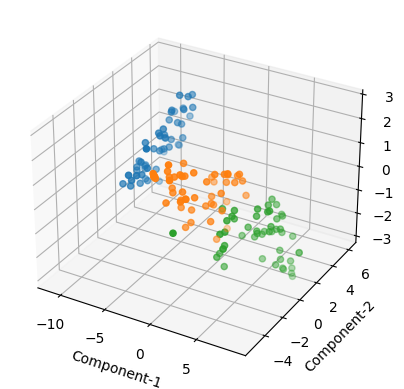

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

X0 = X_dec_data[y==0]
X1 = X_dec_data[y==1]
X2 = X_dec_data[y==2]
ax.scatter(X0[:, 0], X0[:, 1], X0[:, 2])
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2])
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2])

ax.set_xlabel("Component-1")
ax.set_ylabel("Component-2")
ax.set_zlabel("Component-3")

plt.show()

In [ ]:
import plotly
import plotly.express

fig=plotly.express.scatter_3d(x=X_dec_data[:,0], y=X_dec_data[:,1], z=X_dec_data[:,2], color=y,)
fig.update_traces(marker=dict(size=4))
fig.show()

In [ ]:
from sklearn.manifold import TSNE


model=TSNE(n_components=2)

# Extract the main components
model=model.fit(X)

# Transform data to principal components
X_dec_data=model.fit_transform(X)

In [ ]:
X_dec_data

array([[-2.35809307e+01, -5.22060156e-01],
       [-2.62917042e+01, -1.09369588e+00],
       [-2.61933346e+01,  5.30571826e-02],
       [-2.66382561e+01, -3.21696430e-01],
       [-2.35450134e+01, -9.41376507e-01],
       [-2.16082954e+01, -8.10961246e-01],
       [-2.59608002e+01,  4.58464950e-01],
       [-2.43470783e+01, -4.96076971e-01],
       [-2.73912773e+01, -3.01681638e-01],
       [-2.57687702e+01, -9.45293069e-01],
       [-2.20654278e+01, -1.82509467e-01],
       [-2.49495239e+01, -8.73362005e-01],
       [-2.65746098e+01, -8.87391508e-01],
       [-2.75171375e+01,  3.22735608e-01],
       [-2.07749710e+01, -9.77787822e-02],
       [-2.05931244e+01, -6.52583599e-01],
       [-2.14729099e+01, -4.12662476e-01],
       [-2.35401649e+01, -3.40562731e-01],
       [-2.12914257e+01,  9.89724994e-02],
       [-2.25217514e+01, -9.96302843e-01],
       [-2.26839333e+01,  5.70334435e-01],
       [-2.28101254e+01, -8.04687738e-01],
       [-2.59318562e+01,  1.24782252e+00],
       [-2.

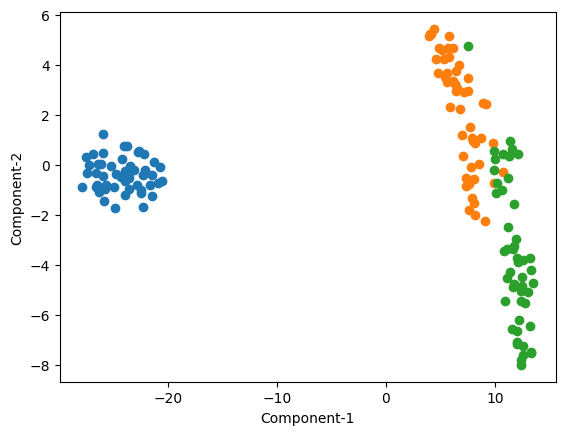

In [ ]:
import matplotlib.pyplot as plt
ig, ax = plt.subplots()

X0 = X_dec_data[y==0]
X1 = X_dec_data[y==1]
X2 = X_dec_data[y==2]
ax.scatter(X0[:, 0], X0[:, 1])
ax.scatter(X1[:, 0], X1[:, 1])
ax.scatter(X2[:, 0], X2[:, 1])

ax.set_xlabel("Component-1")
ax.set_ylabel("Component-2")


plt.show()

In [ ]:
import plotly
import plotly.express

fig=plotly.express.scatter(x=X_dec_data[:,0], y=X_dec_data[:,1], color=y)
fig.update_traces(marker=dict(size=10))
fig.show()

# Clustering (unsupervised learning)

- Let's solve the problem of dividing the data into three clusters, each using four variables: sepal.length (length of the petals), sepal.width (width of the petals), petal.length (length of the petals) and petal.width (width of the petals).

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## k-means method
- The following algorithm is used to compile clusters
  - (1) Select an appropriate point in the data by the number of clusters (k), and make it the initial center of gravity.
  - (2)Calculate the center of gravity for each data, and set the closest center of gravity as the cluster to which the data belongs.
  - (3) Calculate the average of the data points for each cluster and make it the new center of gravity.
  - (4) Repeat (2) and (3) until the cluster to which the data belongs does not change or the upper limit of the calculation step is reached.

In [ ]:
from sklearn.cluster import KMeans

model= KMeans(n_clusters=3)

model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [ ]:
labels=model.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
cluster_centers=model.cluster_centers_
cluster_centers

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

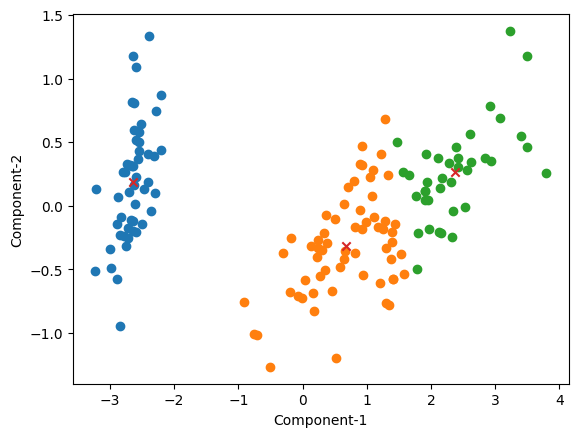

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n_components=2

model=PCA(n_components=n_components)

# Extract the main components
model=model.fit(X)

# Transform data to principal components
X_trans=model.transform(X)

# Transform cluster centers to principal components
cluster_centers_trans=model.transform(cluster_centers)


ig, ax = plt.subplots()

X0 = X_trans[labels==0]
X1 = X_trans[labels==1]
X2 = X_trans[labels==2]
ax.scatter(X0[:, 0], X0[:, 1])
ax.scatter(X1[:, 0], X1[:, 1])
ax.scatter(X2[:, 0], X2[:, 1])
ax.scatter(cluster_centers_trans[:,0],cluster_centers_trans[:,1], marker='x')

ax.set_xlabel("Component-1")
ax.set_ylabel("Component-2")

plt.show()

## Mixed Gaussian Distribution
- A model that represents a given data set as a superposition of multiple Gaussian (normal) distributions


In [ ]:
from sklearn.mixture import GaussianMixture

model= GaussianMixture(n_components=3)

model.fit(X)

GaussianMixture(n_components=3)

In [ ]:
labels=model.predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Mean of each Gaussian distribution
means=model.means_
means

array([[6.54639415, 2.94946365, 5.48364578, 1.98726565],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9170732 , 2.77804839, 4.20540364, 1.29848217]])

In [ ]:
# Variance of each Gaussian distribution
cov=model.covariances_
cov

array([[[0.38744093, 0.09223276, 0.30244302, 0.06087397],
        [0.09223276, 0.11040914, 0.08385112, 0.05574334],
        [0.30244302, 0.08385112, 0.32589574, 0.07276776],
        [0.06087397, 0.05574334, 0.07276776, 0.08484505]],

       [[0.121765  , 0.097232  , 0.016028  , 0.010124  ],
        [0.097232  , 0.140817  , 0.011464  , 0.009112  ],
        [0.016028  , 0.011464  , 0.029557  , 0.005948  ],
        [0.010124  , 0.009112  , 0.005948  , 0.010885  ]],

       [[0.2755171 , 0.09662295, 0.18547072, 0.05478901],
        [0.09662295, 0.09255152, 0.09103431, 0.04299899],
        [0.18547072, 0.09103431, 0.20235849, 0.06171383],
        [0.05478901, 0.04299899, 0.06171383, 0.03233775]]])

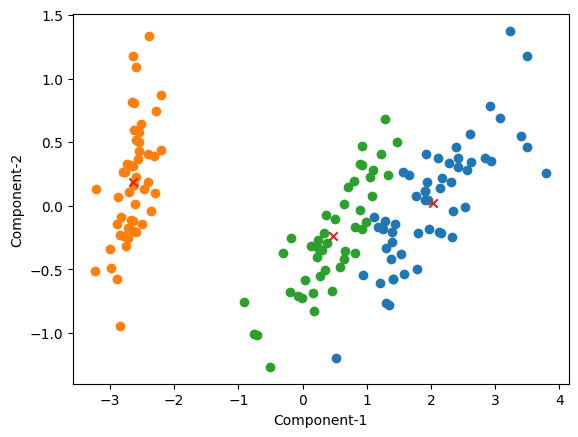

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n_components=2

model=PCA(n_components=n_components)

# Extract the main components
model=model.fit(X)

# Transform data to principal components
X_trans=model.transform(X)

# Transform cluster centers to principal components
cluster_centers_trans=model.transform(means)


ig, ax = plt.subplots()

X0 = X_trans[labels==0]
X1 = X_trans[labels==1]
X2 = X_trans[labels==2]
ax.scatter(X0[:, 0], X0[:, 1])
ax.scatter(X1[:, 0], X1[:, 1])
ax.scatter(X2[:, 0], X2[:, 1])
ax.scatter(cluster_centers_trans[:,0],cluster_centers_trans[:,1], marker='x')

ax.set_xlabel("Component-1")
ax.set_ylabel("Component-2")

plt.show()

## Hierarchical clustering

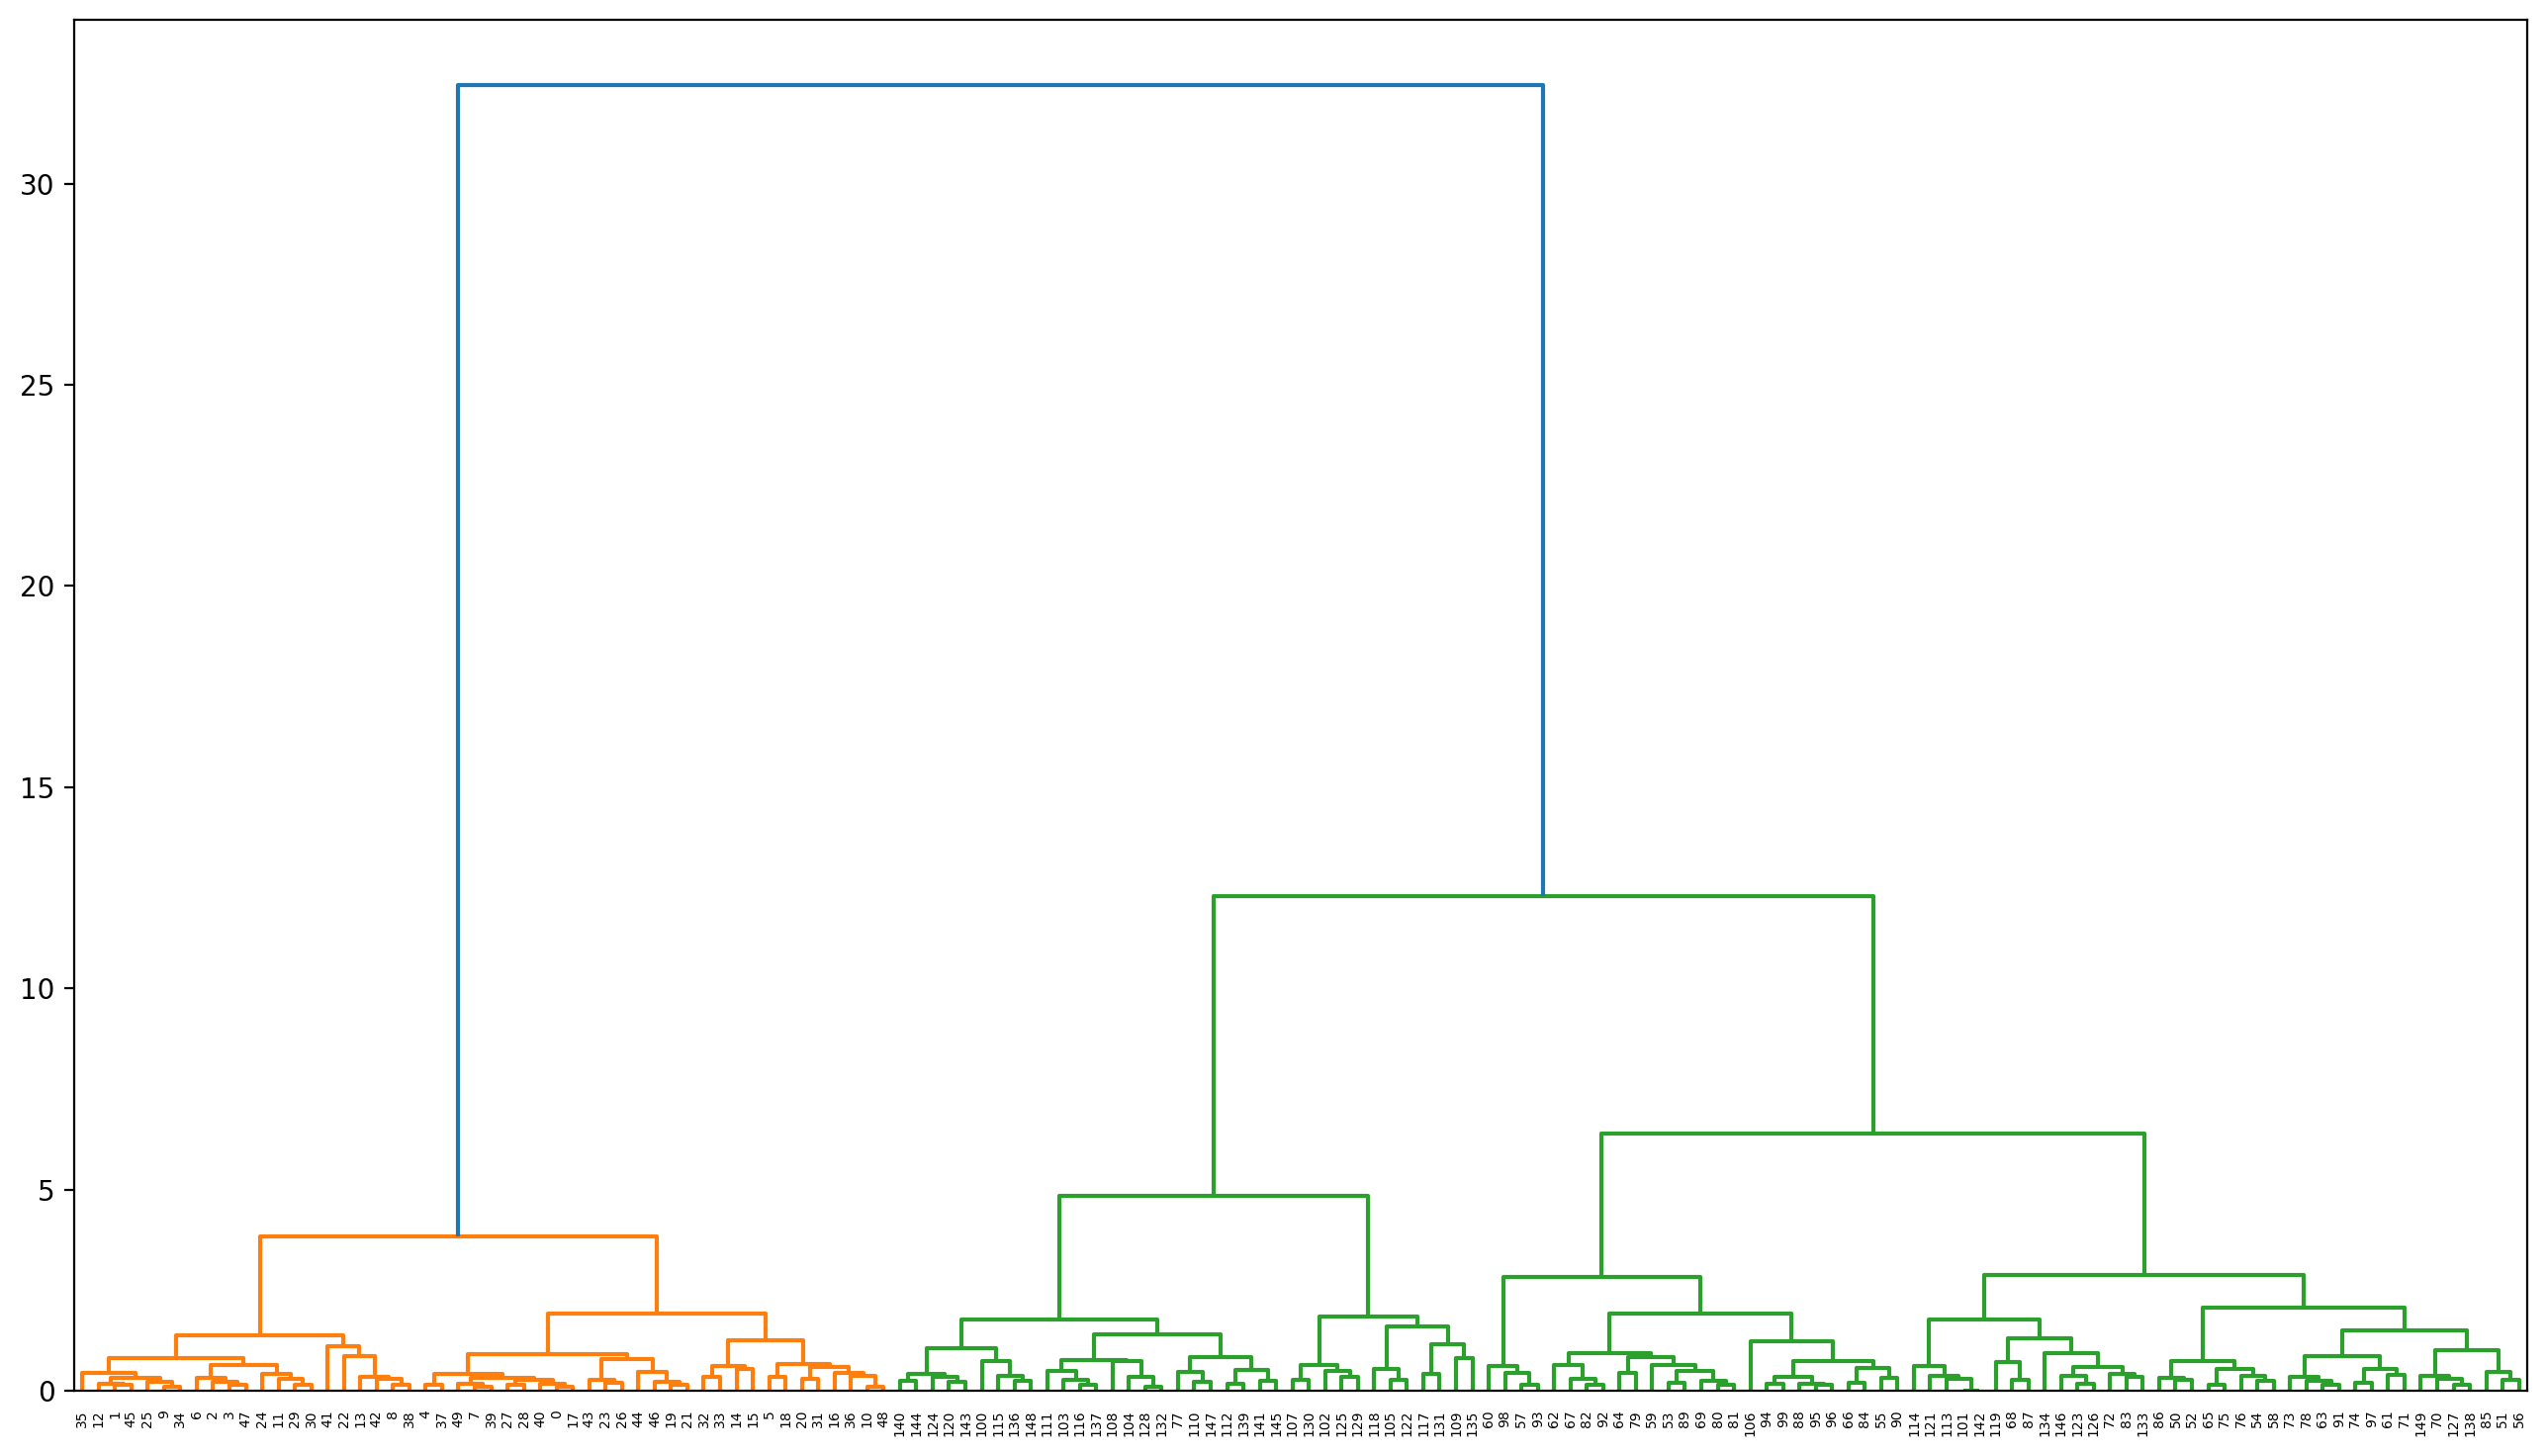

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Hierarchical clustering
# Ward's method Euclidean distance
# Ward's method: a method for merging two clusters so that the sum of squares within the clusters is minimized
linkage_result = linkage(X, method='ward', metric='euclidean')
# Determine clustering thresholds
threshold = 0.7 * np.max(linkage_result[:, 2])

# Visualization of hierarchical clustering
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, color_threshold=threshold)
plt.show()

# Get the value of the clustering result
clustered = fcluster(linkage_result, threshold, criterion='distance')
print(clustered)

In [ ]:
linkage_result.shape

(149, 4)

## Extract the main colors of an image by clustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import PIL
from PIL import Image
import cv2
import sklearn
from sklearn.cluster import KMeans

imgpath='/content/drive/MyDrive/Colab Notebooks/Class/MusashinoUniversity/AdvancedArtificialIntelligence/Lec04/sunflower.jpg'

cv2_img = cv2.imread(imgpath)

cv2_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
img = cv2_img.reshape((cv2_img.shape[0] * cv2_img.shape[1], 3))
img.shape

(120000, 3)

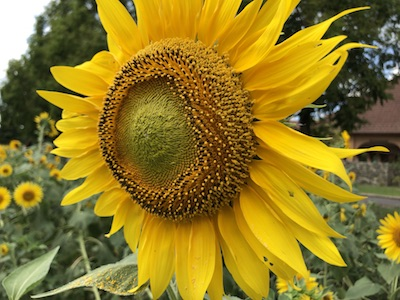

In [ ]:
from IPython.display import display
from PIL import Image
new_img_obj = Image.fromarray(cv2_img)
display(new_img_obj)

In [ ]:
img

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [ 55,  60,  37],
       [ 48,  53,  30],
       [ 41,  46,  23]], dtype=uint8)

In [ ]:
np.unique(img, axis=0).shape

(63191, 3)

In [ ]:
# Number of clusters 8, i.e., 8 main colors to be extracted

#model = KMeans(n_clusters=8)
#cluster = model.fit(img)

cluster = KMeans(n_clusters=8, n_init="auto").fit(img)

In [ ]:
labels=cluster.labels_
labels

array([4, 4, 4, ..., 3, 3, 3], dtype=int32)

In [ ]:
cluster_centers=cluster.cluster_centers_.astype(np.uint8)
cluster_centers

array([[170, 171, 119],
       [ 82,  74,  31],
       [232, 194,  24],
       [ 42,  40,  17],
       [248, 249, 246],
       [199, 153,  12],
       [107, 112,  77],
       [149, 112,  26]], dtype=uint8)

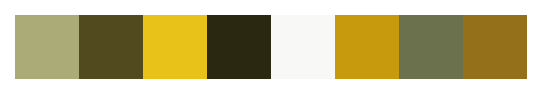

In [ ]:
IMG_SIZE = 64
MARGIN = 15
width = IMG_SIZE * 8 + MARGIN * 2
height = IMG_SIZE + MARGIN * 2
tiled_color_img = Image.new(mode='RGB', size=(width, height), color='#ffffff')
for i, rgb_arr in enumerate(cluster_centers):
    color_hex_str = '#%02x%02x%02x' % tuple(rgb_arr)
    color_img = Image.new(
        mode='RGB', size=(IMG_SIZE, IMG_SIZE),
        color=color_hex_str)
    tiled_color_img.paste(
        im=color_img,
        box=(MARGIN + IMG_SIZE * i, MARGIN))
display(tiled_color_img)

# [Personal assignment 2] Clustering colors

- Create a program that reads in any image file (jpg or png in color), extracts the four main colors of the image using k-mean, and displays a new image file with the four colors.


# [Individual Assignment 2-2] Customer clustering exercise with Wholesale customers data
- Wholesale customers Data Set (https://archive.ics.uci.edu/ml/datasets/Wholesale+customers ) is a wholesaler's customer list
- Data contents
  - Channel: Sales channel, 1: Horeca (hotels, restaurants, cafes), 2: retail for individuals
  - Region: Region of each customer: 1: Lisbon, 2: Porto, 3: other
  - Fresh: Annual order value of fresh produce
  - Milk: Annual order value of dairy products
  - Grocery: Annual order value of groceries
  - Frozen: Frozen food products annual order value
  - Detergents_Paper: Annual order value of hygiene products and paper
  - Delicassen: Annual order value of Delicassen